# Being careful with correlation

We have already seen that correlation can be deceptive: for example, it measures *linear* association, yet many relationships of interest are *non*-linear.  Here we look at two further problems you should be aware of.

## Outliers


Outliers are 

> observations that are very far from others in the data. They are *extreme* insofar as they are typically the maximum or minimum of the data in some dimension.

They can cause problems for all statistical analysis, and correlation is no different.  To get a sense of this, consider the following data taken from the [Death Penalty Information Center](https://deathpenaltyinfo.org/).  We will be interested in the number of executions *per state* since 1976.  For many states this number is zero, and we will not consider them below.  We want to understand the relationship between the number of executions (historically), and the number of people currently sentenced to death in these states.  Note that the "states" here includes the US Federal Government, which also executes people. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
dr_data = pd.read_csv("data/deathrow_data.csv")

Let's plot the points, and record the correlation.

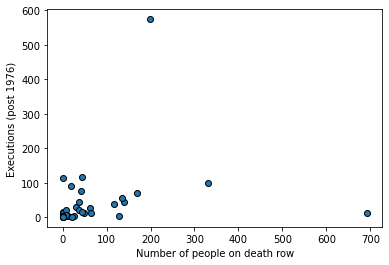

death_row_current  total_exec_post76
death_row_current           1.000000           0.221898
total_exec_post76           0.221898           1.000000

In [2]:
plt.scatter(dr_data["death_row_current"],
            dr_data["total_exec_post76"], ec="black")
plt.ylabel("Executions (post 1976)")
plt.xlabel("Number of people on death row")
plt.show()

dr_ex = dr_data[["death_row_current","total_exec_post76"]]
dr_ex.corr()

As we might expect, states that have more people on death row (a rough proxy for the death penalty, perhaps) have generally executed more people historically.  The correlation is positive, and around $0.22$.  But there is an outlier: Texas.  We show it in red below.

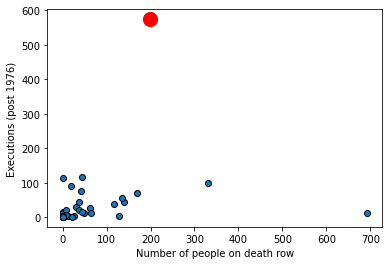

In [3]:
texas = dr_data.loc[dr_data["state"] == "Texas"]

plt.scatter(dr_data["death_row_current"],
            dr_data["total_exec_post76"], ec="black")
plt.ylabel("Executions (post 1976)")
plt.xlabel("Number of people on death row")

plt.scatter(texas["death_row_current"], 
            texas["total_exec_post76"], color="red", s=200)

plt.show()


What happens to the correlation if we *remove* Texas from the data?

In [4]:
no_tex = dr_data.loc[dr_data["state"] != "Texas"]
no_tex_check = no_tex[["death_row_current","total_exec_post76"]]
no_tex_check.corr()

death_row_current  total_exec_post76
death_row_current           1.000000           0.174269
total_exec_post76           0.174269           1.000000

The answer is that it drops, considerably (down to $\sim 0.17$). So, not quite zero, but not far off it.  Exactly what one should do about outliers is not a resolved issue in data science. On the one hand, they may be part of the data (as here), so should perhaps just be left in.  On the other, perhaps they are "misleading" in some sense and should be removed.  For now, just note that outliers can make associations look larger (or smaller) and more general than they "really" are.

## Ecological Fallacy
To motivate the problem here, consider this map from Wikipedia of the 2020 US Presidential election.

:::{figure-md} US2020
<img src="figures/US2020.png" alt="US2020" class="bg-white mb-1" width="400">

2020 US Presidential election outcomes
:::

Let's look particularly at the states won by Biden, the Democratic candidate.  He typically did well on the coasts: California, Oregon, Washington and then New York, Pennsylvania and New England.  Meanwhile, Trump, the Republican candidate, did well in the South, and the middle of the country. Very roughly, the Democrats won the richest states (by income per capita), whereas the Republicans won the poorest states.  

At the state level, it is the case that income per capita is correlated positively with Democratic share of the vote.  Suppose now then, we are told about a very poor person living Alabama, a relatively poor state and one that Trump won with over 60\% of the vote.  Would we expect them to vote Republican *for sure* -- as in, with a high degree of certainty?  The answer to this is generally no: poor *people* tend to vote Democrat.  In fact, around 50% of voters from households making less than \$30,000 a year identify as Democrats, while only about 27\% identify as Republicans.

In short, we have a potential inference problem: a correlation about *states* leads to erroneous conclusions about correlations about *people who live in those states*.

This logical error is very general and is known as (committing the) **Ecological Fallacy**. It says that, generally speaking, 

>  you cannot use correlations based on *aggregates* to draw conclusions about the *individual units* that make up those aggregates.